In [1]:
import pandas as pd
df_t = pd.read_csv('transcript_all.csv')
df_c = df_t.groupby('chat_id').text.apply(' '.join)

In [2]:
# Tokenize chats
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

txt = df_c.apply(lambda s: tokenizer.tokenize(s.lower()))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [23]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['help', 'headout', 'hi', 'hello', 'hey', 'welcome', 'thank', 'check', 'please', 'ok','get', 'yes', 'safari', 'khalifa', 'burj', 'aquarium', 'roman', 'palatin', 'vatican', 'dubai'])

In [24]:
def remove_stopwords(l):
    return [word for word in l if word not in stop_words]

t_s = list(map(remove_stopwords,txt))

In [26]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter_stemmer = PorterStemmer()
def stem_words(l):
    return [porter_stemmer.stem(words) for words in l]

stem_list = list(map(stem_words,t_s))

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_words(l):
    return [wordnet_lemmatizer.stem(words) for words in l]

lemma_list = list(map(stem_words,stem_list))

In [29]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_words(l):
    return [wordnet_lemmatizer.stem(words) for words in l]

lemma_list = list(map(stem_words,stem_list))

In [31]:
import gensim

In [33]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(stem_list)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in lemma_list]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/flow.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Hashable
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concate

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.224630  0.072209       1        1  10.488244
1     -0.190610  0.048842       2        1   8.367077
15    -0.133379 -0.015400       3        1   6.155117
5     -0.056258  0.079599       4        1   6.001558
8     -0.056805 -0.140004       5        1   5.745404
13    -0.061338  0.006210       6        1   5.574125
3      0.030625  0.058380       7        1   5.379726
6     -0.082890  0.042651       8        1   5.204351
16    -0.030197 -0.111854       9        1   5.138270
10    -0.067222 -0.273735      10        1   4.968133
0     -0.168598  0.103693      11        1   4.932311
2      0.160640  0.150878      12        1   4.816368
17     0.115892  0.196968      13        1   4.125977
14    -0.019472 -0.228907      14        1   3.873810
4     -0.009753  0.164666      15        1   3.707039
12     0.051790 -0.069449      16        1   3.612849
7      0.224597 -0.047460      17        1   3.447381
19     0.046597  0.058112      18        1   3.067425
11     0.225908 -0.148421      19        1   2.956419
18     0.245103  0.053021      20        1   2.438410, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
756   Default  21806.000000       today  21806.000000  30.0000  30.0000
5     Default  28680.000000      ticket  28680.000000  29.0000  29.0000
73    Default  12730.000000        tour  12730.000000  28.0000  28.0000
281   Default   8597.000000        seat   8597.000000  27.0000  27.0000
137   Default   9027.000000         day   9027.000000  26.0000  26.0000
48    Default   9582.000000        time   9582.000000  25.0000  25.0000
7     Default   5456.000000      assist   5456.000000  24.0000  24.0000
10    Default  17338.000000        book  17338.000000  23.0000  23.0000
9     Default   7644.000000       avail   7644.000000  22.0000  22.0000
222   Default   4872.000000       price   4872.000000  21.0000  21.0000
246   Default   5614.000000         use   5614.000000  20.0000  20.0000
57    Default   5458.000000         com   5458.000000  19.0000  19.0000
380   Default   4757.000000       email   4757.000000  18.0000  18.0000
271   Default   3822.000000        line   3822.000000  17.0000  17.0000
6     Default   4134.000000       anyth   4134.000000  16.0000  16.0000
18    Default   4811.000000        free   4811.000000  15.0000  15.0000
61    Default   3941.000000        http   3941.000000  14.0000  14.0000
30    Default   6430.000000          us   6430.000000  13.0000  13.0000
3220  Default   4428.000000          el   4428.000000  12.0000  12.0000
118   Default   6940.000000       sorri   6940.000000  11.0000  11.0000
414   Default   3452.000000        chat   3452.000000  10.0000  10.0000
361   Default   3746.000000        card   3746.000000   9.0000   9.0000
148   Default   5554.000000         tri   5554.000000   8.0000   8.0000
150   Default   9190.000000       would   9190.000000   7.0000   7.0000
17    Default   3319.000000        feel   3319.000000   6.0000   6.0000
481   Default   3703.000000           1   3703.000000   5.0000   5.0000
166   Default   2878.000000        pick   2878.000000   4.0000   4.0000
698   Default   3533.000000        guid   3533.000000   3.0000   3.0000
32    Default   3181.000000          30   3181.000000   2.0000   2.0000
26    Default   5571.000000        show   5571.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
1015  Topic20    444.400513         saw    445.067749   3.7123  -4.0407
3283  Topic20    436.635315         del    437.302551   3.7123  -4.0584
254   Topic20    430.341949       dhabi    431.009186   3.7123  -4.0729
503   Topic20    428.633636      friend    429.300873   3.7123  -4.0769
4773  Topic20    377.997467          un    378.664703   3.7121  -4.2026
1394  Topic20    370.702240      

In [74]:
lda_model.show_topic(5)

[('day', 0.14512786),
 ('pass', 0.052232),
 ('visit', 0.03607698),
 ('combo', 0.029535271),
 ('valid', 0.027196078),
 ('park', 0.025047543),
 ('a', 0.02076887),
 ('attract', 0.020322066),
 ('one', 0.019267585),
 ('5', 0.018773561)]

In [76]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, df_c)

# Format
df_topic = df_topic_sents_keywords.reset_index()
df_topic.columns = ['document_no', 'topic_no', 'perc_contrib', 'keywords', 'text']

# Show
df_topic.head(10)

,document_no,topic_no,perc_contrib,keywords,text
0,0,9.0,0.5916,"ticket, book, avail, date, show, would, buy, l...",Hello. How may I help you? Hello. How may I he...
1,1,9.0,0.5916,"ticket, book, avail, date, show, would, buy, l...",Hello. How may I help you? Hello. How may I he...
2,2,9.0,0.5916,"ticket, book, avail, date, show, would, buy, l...",Hello. How may I help you? Hello. How may I he...
3,3,9.0,0.5915,"ticket, book, avail, date, show, would, buy, l...",Hello. How may I help you? Hello. How may I he...
4,4,0.0,0.6580,"ticket, adult, 2, year, tower, need, kid, chil...",Hello. How may I help you? Hi! How are! My chi...
5,5,10.0,0.5559,"assist, anyth, free, el, feel, us, today, like...",Hello. How may I help you? What are the dates ...
6,6,10.0,0.3861,"assist, anyth, free, el, feel, us, today, like...",Hello. How may I help you? How much time to ta...
7,7,2.0,0.7045,"tour, com, http, www, link, citi, includ, prod...",Hello. How may I help you? Hi Phil i had an en...
8,8,10.0,0.3761,"assist, anyth, free, el, feel, us, today, like...",Hello. How may I help you? Looking for two tic...
9,9,5.0,0.3898,"day, pass, visit, combo, valid, park, a, attra...",Hello. How may I help you? I wanted to book yo...


In [40]:
sum(df_dominant_topic.topic_no == 9)

856

In [62]:
sum(df_dominant_topic.topic_no == 9)/df_dominant_topic.shape[0]

0.15893056071295952

In [87]:
df_topic[:1000].groupby('topic_no').first().keywords

topic_no
0.0     ticket, adult, 2, year, tower, need, kid, chil...
1.0     ticket, need, would, purcha, go, time, abl, pr...
2.0     tour, com, http, www, link, citi, includ, prod...
3.0       time, 30, pm, 10, hour, 8, septemb, 00, 9, slot
4.0     line, ticket, skip, de, colosseum, singapor, e...
5.0     day, pass, visit, combo, valid, park, a, attra...
6.0     seat, select, show, section, price, best, offi...
7.0     la, ride, everi, fast, quickli, activ, non, do...
8.0     today, sorri, minut, wait, give, one, assur, t...
9.0     ticket, book, avail, date, show, would, buy, l...
10.0    assist, anyth, free, el, feel, us, today, like...
11.0    el, en, por, para, galleri, di, se, si, una, e...
12.0    pick, hotel, transfer, point, number, drop, lo...
13.0    use, card, tri, code, credit, book, coupon, pa...
14.0    chat, great, talk, us, would, realli, nice, th...
15.0    email, book, receiv, confirm, ticket, send, id...
16.0    reserv, cancel, reach, refund, u, order, need,...
17.0 

In [105]:
top = pd.DataFrame(columns = ['topic_no', 'topic', 'percentage'])

In [125]:
i = 9
top = top.append(pd.DataFrame({'topic_no': [i], 'topic': ['booking tours'], 'percentage': [sum(df_topic.topic_no == i)/df_topic.shape[0]]}))
top

,topic_no,topic,percentage
0,6,choosing seat,0.063869
1,16,refund,0.033977
2,3,available times,0.041961
3,13,payment,0.068697
4,19,discount offer,0.018381
5,15,reservation,0.054586
0,9,booking tours,0.159116


In [126]:
top = top.reset_index(drop=True)

In [135]:
top = top.sort_values('percentage', ascending=False)

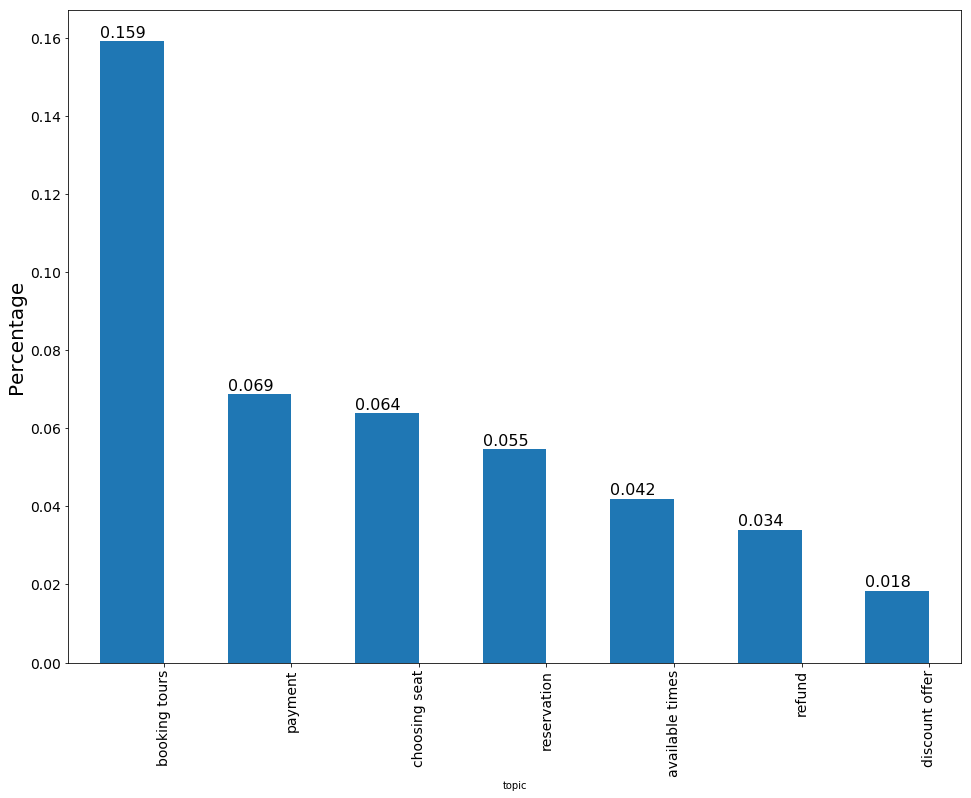

In [150]:
ax1 = top.set_index('topic').drop('topic_no',1).plot(kind='bar',figsize=(16,12),width=.5,position=1,fontsize=14)
for i,p in enumerate(ax1.patches):
    ax1.annotate(str(round(top.reset_index().percentage[i],3)),(p.get_x(), p.get_height()+0.001), color='k',fontsize=16)
ax1.legend_.remove()
plt.ylabel('Percentage',fontsize=20)
# plt.savefig('chat_rank.png')
plt.show()

Hello. How may I help you? hello this is my third time to ask about my ticket that i booked for tomorrow with dhow cruise. the last time he said it will be emailed to me at the end of the dayl. payment already credited to my card. heres my reference 230007 under sheila mae garcia Thank you Our vendor is currently closed, they will open tomorrow morning, we will confirm the reservation tomorrow morning. I apologize for the delay. what will happen if tomorrow they will not send me my ticket? i will go to dubai tomorrow and maybe i will not have my internet. You will receive it Ma'am, we will get back to you as soon as possible tomorrow morning. since morning i have already inquire.... in the afternoon also i asked. during that time they are open and according to your agent i will receive an email at the end of the day. I apologize for that Ma'am, we will confirm with you as soon as our vendor gets back to us. Thank you for your patience. please just make sure that i will receive it first